In [3]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-01.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-03.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2016-02.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-03.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-01.csv
/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-02.csv


Task : Perform hyper-parameter tuning for Regression models. 

       2a. Linear Regression: Grid Search 
       
       2b. Random Forest: Random Search  
       
       2c. Xgboost: Random Search

In [4]:
df = pd.read_csv("/kaggle/input/taxidemandfarepredictiondataset/yellow_tripdata_2015-02.csv")
df = df.sample(frac=0.05)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
7678364,2,2015-02-03 21:47:34,2015-02-03 21:59:52,1,2.47,-74.007660,40.740837,1,N,-73.979370,40.752739,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76
5500132,1,2015-02-15 03:20:06,2015-02-15 03:28:08,2,2.70,-73.951286,40.714169,1,Y,-73.905144,40.720322,1,10.0,0.5,0.5,0.00,0.0,0.3,11.30
10969310,2,2015-02-22 13:55:44,2015-02-22 14:20:39,5,4.07,-73.972404,40.689568,1,N,-73.999786,40.733246,1,19.5,0.0,0.5,4.06,0.0,0.3,24.36
2906821,2,2015-02-08 15:03:43,2015-02-08 15:10:19,1,0.93,-73.952240,40.768913,1,N,-73.966980,40.772797,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80
8862376,1,2015-02-03 06:38:50,2015-02-03 06:49:06,1,2.00,-73.949913,40.770184,1,N,-73.975845,40.776482,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80


In [6]:
print(df.shape, df.columns)

(622526, 19) Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [7]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
df['RateCodeID'].value_counts()
df['payment_type'].value_counts()
df['store_and_fwd_flag'].value_counts()

N    616796
Y      5730
Name: store_and_fwd_flag, dtype: int64

In [9]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)
df[['VendorID','RateCodeID','payment_type', 'store_and_fwd_flag' ]] = df[['VendorID','RateCodeID','payment_type', 'store_and_fwd_flag' ]].astype(str)

In [10]:
df.describe(include='all').T


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
VendorID,622526,2,2,325055,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_pickup_datetime,622526,535678,2015-02-20 09:47:15,6,2015-02-01 00:00:00,2015-02-28 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tpep_dropoff_datetime,622526,536038,2015-02-05 00:00:00,9,2015-02-01 00:01:03,2015-03-31 08:29:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,622526.0,NaN,NaN,NaN,NaT,NaT,1.668944,1.332667,0.0,1.0,1.0,2.0,8.0
trip_distance,622526.0,NaN,NaN,NaN,NaT,NaT,13.459926,8015.888912,0.0,1.0,1.68,3.07,6318000.0
pickup_longitude,622526.0,NaN,NaN,NaN,NaT,NaT,-72.541705,10.197964,-121.915184,-73.99189,-73.981781,-73.966629,0.0
pickup_latitude,622526.0,NaN,NaN,NaN,NaT,NaT,39.961373,5.617588,0.0,40.735241,40.752735,40.767441,45.827545
RateCodeID,622526,7,1,608894,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,622526,2,N,616796,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_longitude,622526.0,NaN,NaN,NaN,NaT,NaT,-72.583872,10.046448,-121.914993,-73.99131,-73.979759,-73.962227,0.0


In [11]:
df = df.drop_duplicates(keep='last')
df.shape

(622526, 19)

In [12]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [13]:
# remove pickup and drops outside newyork city limits

df.drop(df.index[
        ~((df['pickup_latitude'].between(40.496115395170364, 40.91553277700258)) &
          (df['pickup_longitude'].between(-74.25559136315209, -73.7000090639354))) 
], inplace=True)

df.drop(df.index[
        ~((df['dropoff_latitude'].between(40.496115395170364, 40.91553277700258)) &
          (df['dropoff_longitude'].between(-74.25559136315209, -73.7000090639354))) 
], inplace=True)
df.shape

(608914, 19)

In [14]:
df = df.reset_index()

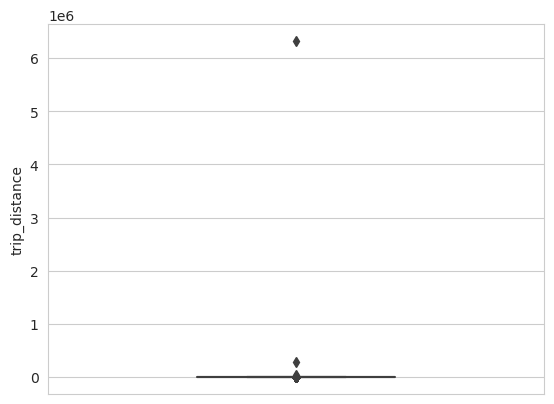

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

def bplot(df, a):
    sns.set_style('whitegrid')
    sns.boxplot(y=a, data=df, width=0.4)
    plt.show()

bplot(df, 'trip_distance')

In [16]:
def computer_remove_outliers(df, x, remove_outlier=1):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3-q1
    ll = q1 - 1.5*(iqr)
    ul = q3 + 1.5*(iqr)
    print('lower limit of dist is {} and upper limit of dist is {}'.format(ll, ul))
    if remove_outlier==1:
        df = df[(df[x]>ll) & (df[x]<ul)]
        df.shape
        return df

df = computer_remove_outliers(df, 'trip_distance')
df = df[df['trip_distance'] > 0]

lower limit of dist is -2.1049999999999995 and upper limit of dist is 6.174999999999999


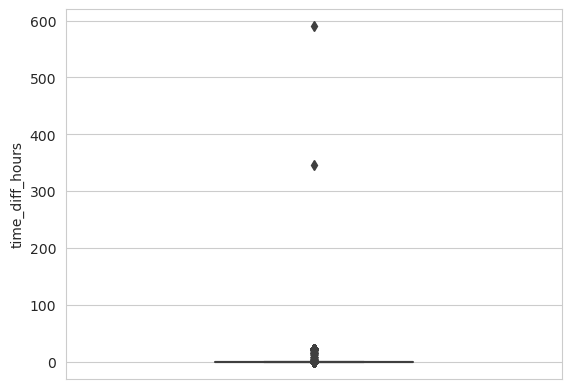

In [17]:
df['time_diff_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype('timedelta64[h]')
df['time_diff_hours'] = df['time_diff_hours'].astype(int)
bplot(df, 'time_diff_hours')

(df['time_diff_hours'].value_counts().sort_values(ascending=False))
df = df[df["time_diff_hours"] < 2]
df.shape

# remove cancelled rides
df['time_diff_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).astype('timedelta64[m]')
df[df['time_diff_min']==0]
df = df[df["time_diff_min"] > 0]  


In [18]:
# remove uncommon passenger counts
df["passenger_count"].value_counts(normalize=True).sort_values(ascending=False) * 100
df = df[(df["passenger_count"] <=3) & (df["passenger_count"] >0)]
df.shape

(485151, 22)

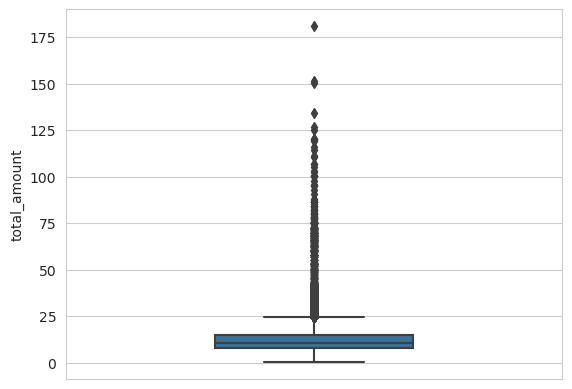

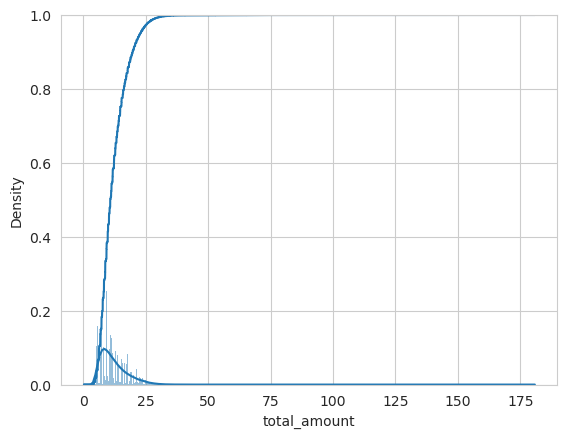

lower limit of dist is -1.8000000000000007 and upper limit of dist is 24.76


(485060, 22)

In [19]:
df = df[(df['total_amount'] > 0) & (df['total_amount'] < 500)]
df.shape

df = df[df['extra'] >= 0]
df.shape

bplot(df, 'total_amount')

sns.set_style('whitegrid')
sns.histplot(kde=True, data=df['total_amount'], stat='density')
sns.ecdfplot(df['total_amount'])
plt.show()

computer_remove_outliers(df, 'total_amount', 0)

# based on above analysis, we can easily remove total amount > 200 even though the max from box plot came out as $25
df = df[df['total_amount'] < 200]
df.shape

In [20]:
df_location = df[['pickup_latitude', 'pickup_longitude']]

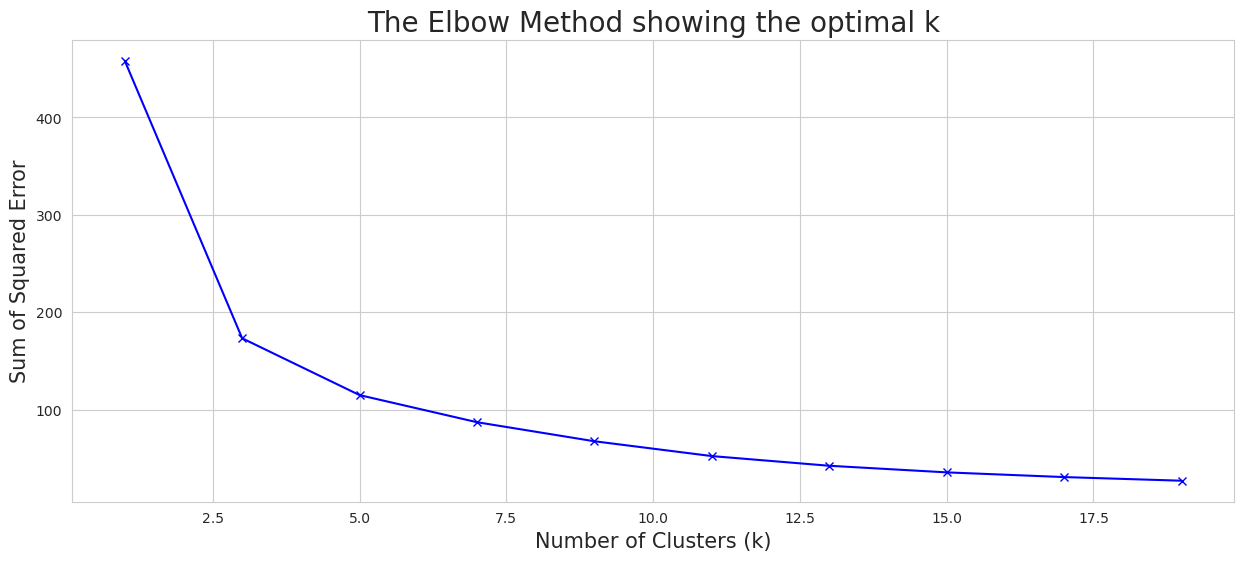

In [21]:
# Elbow plot to find k in k means
# from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
sse = []
K = range(1,20, 2)
for k in K:
     kmeanModel = KMeans(n_clusters=k)
     kmeanModel.fit(df_location)
     sse.append(kmeanModel.inertia_)

plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k', fontsize = 20)
plt.show()

In [22]:
df_location.dtypes

pickup_latitude     float64
pickup_longitude    float64
dtype: object

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


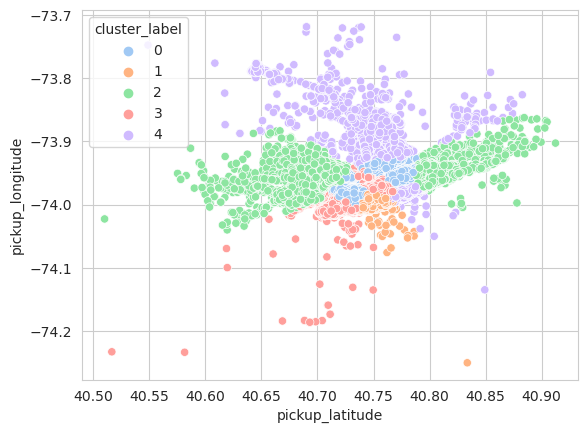

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5) 
df_location['cluster_label'] = kmeans.fit_predict(df_location)  # df_location has lat and long in a DF.
df_location['cluster_label'].value_counts().sort_values(ascending=False)

sns.set_style('whitegrid')
sns.scatterplot(x='pickup_latitude', y = 'pickup_longitude', data=(df_location),hue='cluster_label', palette='pastel')
plt.show()

In [46]:
df_with_loc_clusters = pd.merge(df_location, df, on=['pickup_latitude', 'pickup_longitude'])

In [47]:
df_with_loc_clusters['pickup_hour'] = df_with_loc_clusters["tpep_pickup_datetime"].dt.hour
df_with_loc_clusters['pickup_dayofweek'] = df_with_loc_clusters["tpep_pickup_datetime"].dt.dayofweek

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_with_loc_clusters.head()

,pickup_latitude,pickup_longitude,cluster_label,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_diff_hours,time_diff_min,pickup_hour,pickup_dayofweek
0,40.740837,-74.007660,1,7678364,2,2015-02-03 21:47:34,2015-02-03 21:59:52,1,2.47,1,N,-73.979370,40.752739,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76,0,12.0,21,1
1,40.714169,-73.951286,2,5500132,1,2015-02-15 03:20:06,2015-02-15 03:28:08,2,2.70,1,Y,-73.905144,40.720322,1,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0,8.0,3,6
2,40.768913,-73.952240,0,2906821,2,2015-02-08 15:03:43,2015-02-08 15:10:19,1,0.93,1,N,-73.966980,40.772797,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,0,6.0,15,6
3,40.770184,-73.949913,0,8862376,1,2015-02-03 06:38:50,2015-02-03 06:49:06,1,2.00,1,N,-73.975845,40.776482,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,0,10.0,6,1
4,40.769760,-73.969002,0,4052143,1,2015-02-04 21:23:39,2015-02-04 21:30:14,1,1.50,1,N,-73.987892,40.779690,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,0,6.0,21,2


In [50]:
df_model = df_with_loc_clusters.groupby(['pickup_dayofweek','pickup_hour', 'cluster_label']).size().reset_index()
df_model = df_model.rename(columns={0:'demand'})
df_model['demand'] = df_model['demand']/df_model['demand'].max()
df_model['demand'] = round((df_model['demand'] * 100), 2)
df_model.head()
df_model.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
pickup_dayofweek,840.0,3.000000,2.001192,0.00,1.0000,3.000,5.000,6.0
pickup_hour,840.0,11.500000,6.926311,0.00,5.7500,11.500,17.250,23.0
cluster_label,840.0,2.000000,1.415056,0.00,1.0000,2.000,3.000,4.0
demand,840.0,30.737119,23.557148,0.98,10.3175,23.215,48.545,100.0


In [51]:
from sklearn.model_selection import train_test_split

X = df_model.drop(["demand"],axis=1)
y = df_model[['demand']]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=100)

from sklearn.preprocessing import OneHotEncoder
cat_columns = ['pickup_dayofweek', 'pickup_hour', 'cluster_label']
enc = OneHotEncoder()
enc.fit(X_train[cat_columns])
X_train_encoded = enc.transform(X_train[cat_columns]).toarray()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=enc.get_feature_names(cat_columns))
X_train_model = pd.concat([X_train.reset_index(), X_train_encoded_df], axis=1).drop(['index'], axis=1)

X_test_encoded = enc.transform(X_test[cat_columns]).toarray()
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=enc.get_feature_names(cat_columns))
X_test_model = pd.concat([X_test.reset_index(), X_test_encoded_df], axis=1).drop(['index'], axis=1)

X_train_model = X_train_model.drop(cat_columns, axis=1)
X_test_model = X_test_model.drop(cat_columns, axis=1)

X_train_model[X_train_model.columns] = X_train_model[X_train_model.columns].astype(int)
X_test_model[X_test_model.columns] = X_test_model[X_test_model.columns].astype(int)

y_train_model = y_train.reset_index().drop(['index'], axis=1)
y_test_model = y_test.reset_index().drop(['index'], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Define models
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('SGD', SGDRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('RandomForest', RandomForestRegressor())) 
models.append(('XGBoost', XGBRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))

for name, model in models:
    print(format(name))
    model.fit(X_train_model, y_train_model)
    
    # Evaluate on training set
    prediction_train = model.predict(X_train_model)
    mse_train = mean_squared_error(prediction_train, y_train_model)
    r2_train = model.score(X_train_model, y_train_model)
    print('{}: Training MSE is {} and R2 is {}'.format(name, round(mse_train, 2), round(r2_train, 2)))

    # Evaluate on test set
    prediction_test = model.predict(X_test_model)
    mse_test = mean_squared_error(prediction_test, y_test_model)
    r2_test = model.score(X_test_model, y_test_model)
    print('{}: Test MSE is {} and R2 is {}'.format(name, round(mse_test, 2), round(r2_test, 2)))

    print('\n')


LinearRegression
LinearRegression: Training MSE is 127.22 and R2 is 0.77
LinearRegression: Test MSE is 141.92 and R2 is 0.73


SVR


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR: Training MSE is 303.55 and R2 is 0.46
SVR: Test MSE is 297.49 and R2 is 0.44


SGD
SGD: Training MSE is 126.76 and R2 is 0.77
SGD: Test MSE is 138.19 and R2 is 0.74


AdaBoost


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


AdaBoost: Training MSE is 340.18 and R2 is 0.39
AdaBoost: Test MSE is 326.6 and R2 is 0.39


RandomForest
RandomForest: Training MSE is 10.84 and R2 is 0.98
RandomForest: Test MSE is 72.92 and R2 is 0.86


XGBoost
XGBoost: Training MSE is 1.2 and R2 is 1.0
XGBoost: Test MSE is 49.68 and R2 is 0.91


GradientBoosting
GradientBoosting: Training MSE is 63.44 and R2 is 0.89
GradientBoosting: Test MSE is 71.37 and R2 is 0.87




/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Hpyerparameter tuning for XGBoost algorithm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
xgb_model = XGBRegressor(eval_metric=mean_squared_error)
param_dist = {"max_depth": [2,5,7],
              "n_estimators": [50, 70, 100, 300, 500, 1000],
              "learning_rate" : [0.01,0.05, 0.1,0.3, 0.5]} 
grid_search = GridSearchCV(xgb_model, param_grid=param_dist, cv = 3, 
                                   verbose=1, n_jobs=-1)
grid_search.fit(X_train_model, y_train_model)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7851e12a7950>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)


[0]	validation_0-rmse:34.95436
[1]	validation_0-rmse:32.09395
[2]	validation_0-rmse:29.53874
[3]	validation_0-rmse:27.29983
[4]	validation_0-rmse:25.32576
[5]	validation_0-rmse:23.54304
[6]	validation_0-rmse:22.01612
[7]	validation_0-rmse:20.58711
[8]	validation_0-rmse:19.36287
[9]	validation_0-rmse:18.33020
[10]	validation_0-rmse:17.40214
[11]	validation_0-rmse:16.48291
[12]	validation_0-rmse:15.73126
[13]	validation_0-rmse:15.10461
[14]	validation_0-rmse:14.55879
[15]	validation_0-rmse:14.07450
[16]	validation_0-rmse:13.58093
[17]	validation_0-rmse:13.11515


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[18]	validation_0-rmse:12.67297
[19]	validation_0-rmse:12.32935
[20]	validation_0-rmse:12.07763
[21]	validation_0-rmse:11.72542
[22]	validation_0-rmse:11.50649
[23]	validation_0-rmse:11.25398
[24]	validation_0-rmse:11.10270
[25]	validation_0-rmse:10.87958
[26]	validation_0-rmse:10.67036
[27]	validation_0-rmse:10.40945
[28]	validation_0-rmse:10.30465
[29]	validation_0-rmse:10.13159
[30]	validation_0-rmse:9.92879
[31]	validation_0-rmse:9.80009
[32]	validation_0-rmse:9.67839
[33]	validation_0-rmse:9.50865
[34]	validation_0-rmse:9.34386
[35]	validation_0-rmse:9.22964
[36]	validation_0-rmse:9.17416
[37]	validation_0-rmse:9.09063
[38]	validation_0-rmse:8.97690
[39]	validation_0-rmse:8.84648
[40]	validation_0-rmse:8.76669
[41]	validation_0-rmse:8.65407
[42]	validation_0-rmse:8.57627
[43]	validation_0-rmse:8.51809
[44]	validation_0-rmse:8.45298
[45]	validation_0-rmse:8.34243
[46]	validation_0-rmse:8.28829
[47]	validation_0-rmse:8.24361
[48]	validation_0-rmse:8.18950
[49]	validation_0-rmse:8.11

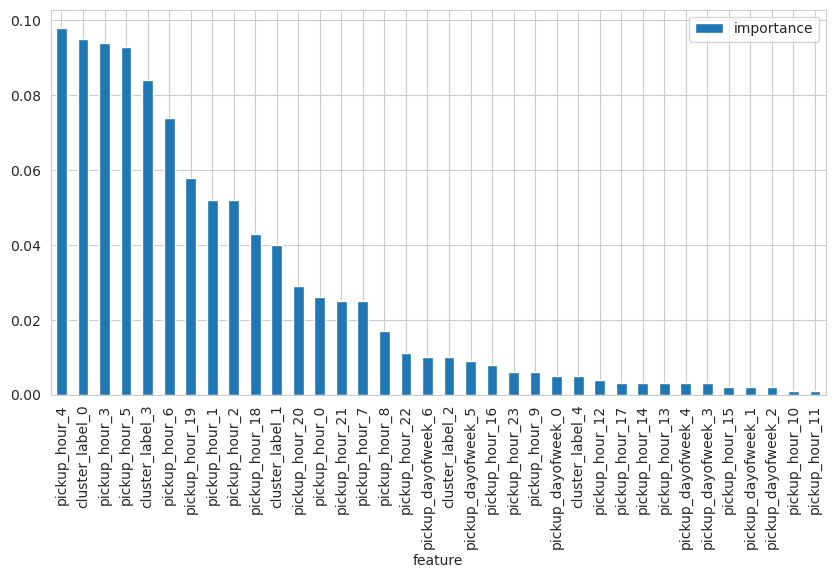

In [53]:
# Training XGboost 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

params = {"max_depth": 5, "learning_rate": 0.1, "n_estimators": 1000}
model = XGBRegressor(**params)
eval_set = [(X_test_model, y_test_model)]
model.fit(X_train_model , y_train_model, eval_set=eval_set, early_stopping_rounds=10) 

prediction_train = model.predict(X_train_model)
mse = mean_squared_error(prediction_train, y_train_model)
r2 = model.score(X_train_model,y_train_model)
print('{}: MSE is {} and R2 is {}'.format('XGBoost on Train', round(mse,2), round(r2,2)))
print('\n')

prediction = model.predict(X_test_model)
mse = mean_squared_error(prediction, y_test_model)
r2 = model.score(X_test_model,y_test_model)
print('{}: MSE is {} and R2 is {}'.format('XGBoost on Test', round(mse,2), round(r2,2)))
print('\n')

importances = pd.DataFrame({'feature':X_train_model.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(10,5))

X_train_model_impfeatures = X_train_model.copy(deep=True) 
X_test_model_impfeatures = X_test_model.copy(deep=True) 

cols_to_remove = ['pickup_dayofweek_0', 'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3', 'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6']
X_train_model_impfeatures = X_train_model_impfeatures.drop(cols_to_remove, axis=1)
X_test_model_impfeatures = X_test_model_impfeatures.drop(cols_to_remove, axis=1)



In [54]:
# Training XGboost using important features only.

params = {"max_depth": 5, "learning_rate": 0.1, "n_estimators": 1000}
model = XGBRegressor(**params)
eval_set = [(X_test_model_impfeatures, y_test_model)]
model.fit(X_train_model_impfeatures , y_train_model, eval_set=eval_set, early_stopping_rounds=10)  # , verbose = True)

prediction_train = model.predict(X_train_model_impfeatures)
mse = mean_squared_error(prediction_train, y_train_model)
r2 = model.score(X_train_model_impfeatures,y_train_model)
print('{}: MSE is {} and R2 is {}'.format('XGBoost on Train', round(mse,2), round(r2,2)))
print('\n')

prediction = model.predict(X_test_model_impfeatures)
mse = mean_squared_error(prediction, y_test_model)
r2 = model.score(X_test_model_impfeatures,y_test_model)
print('{}: MSE is {} and R2 is {}'.format('XGBoost on Test', round(mse,2), round(r2,2)))
print('\n')


[0]	validation_0-rmse:34.95386
[1]	validation_0-rmse:32.09273
[2]	validation_0-rmse:29.53655
[3]	validation_0-rmse:27.28948
[4]	validation_0-rmse:25.31288
[5]	validation_0-rmse:23.52796
[6]	validation_0-rmse:21.99007
[7]	validation_0-rmse:20.57799
[8]	validation_0-rmse:19.35470
[9]	validation_0-rmse:18.33956
[10]	validation_0-rmse:17.34206
[11]	validation_0-rmse:16.54800
[12]	validation_0-rmse:15.77550
[13]	validation_0-rmse:15.14284
[14]	validation_0-rmse:14.63286
[15]	validation_0-rmse:14.13715
[16]	validation_0-rmse:13.62168
[17]	validation_0-rmse:13.21549
[18]	validation_0-rmse:12.86464
[19]	validation_0-rmse:12.56323
[20]	validation_0-rmse:12.30769
[21]	validation_0-rmse:11.98853
[22]	validation_0-rmse:11.79412
[23]	validation_0-rmse:11.61999


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[24]	validation_0-rmse:11.42547
[25]	validation_0-rmse:11.23867
[26]	validation_0-rmse:11.09212
[27]	validation_0-rmse:10.94666
[28]	validation_0-rmse:10.77693
[29]	validation_0-rmse:10.64022
[30]	validation_0-rmse:10.50650
[31]	validation_0-rmse:10.43615
[32]	validation_0-rmse:10.31965
[33]	validation_0-rmse:10.24580
[34]	validation_0-rmse:10.16050
[35]	validation_0-rmse:10.11324
[36]	validation_0-rmse:10.08152
[37]	validation_0-rmse:10.01334
[38]	validation_0-rmse:10.00300
[39]	validation_0-rmse:9.97212
[40]	validation_0-rmse:9.88860
[41]	validation_0-rmse:9.86837
[42]	validation_0-rmse:9.79431
[43]	validation_0-rmse:9.80218
[44]	validation_0-rmse:9.74202
[45]	validation_0-rmse:9.75182
[46]	validation_0-rmse:9.75273
[47]	validation_0-rmse:9.70345
[48]	validation_0-rmse:9.70734
[49]	validation_0-rmse:9.66667
[50]	validation_0-rmse:9.67830
[51]	validation_0-rmse:9.62910
[52]	validation_0-rmse:9.61527
[53]	validation_0-rmse:9.63379
[54]	validation_0-rmse:9.59912
[55]	validation_0-rmse:9

In [ ]:
# Hpyerparameter tuning for Random Forest algorithm

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor()
param_dist = { 
    'n_estimators': [200, 500, 1000],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]  
}
grid_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv = 3, 
                                   verbose=1, n_jobs=-1)
grid_search.fit(X_train_model, y_train_model)
print(grid_search.best_estimator_)

In [ ]:
# Training random forest 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

params = {"max_depth": 8, "min_samples_split": 7, "n_estimators": 1000}
model_rf = RandomForestRegressor(**params)
model_rf.fit(X_train_model , y_train_model) 

prediction_train = model_rf.predict(X_train_model)
mse = mean_squared_error(prediction_train, y_train_model)
r2 = model.score(X_train_model,y_train_model)
print('{}: MSE is {} and R2 is {}'.format('random forest on Train', round(mse,2), round(r2,2)))
print('\n')

prediction = model_rf.predict(X_test_model)
mse = mean_squared_error(prediction, y_test_model)
r2 = model_rf.score(X_test_model,y_test_model)
print('{}: MSE is {} and R2 is {}'.format('random forest on Test', round(mse,2), round(r2,2)))
print('\n')



In [35]:
prediction

array([ 5.69114256e+00,  3.62246666e+01,  4.81978836e+01,  8.19836617e+00,
        2.51558733e+00, -1.94596374e+00, -1.39724803e+00,  2.23816156e+00,
        4.85560274e+00,  2.78190956e+01,  3.32773924e+00,  4.07253408e+00,
        8.74731255e+00,  2.80281105e+01,  2.13656640e+00,  1.18521996e+01,
        5.08290243e+00,  4.43095446e+00, -1.21935165e+00,  2.69105721e+01,
        8.19836617e+00,  6.10799904e+01,  2.57018032e+01,  1.04224367e+01,
        4.22468414e+01,  4.81978836e+01,  2.78190956e+01,  8.61164703e+01,
        4.18022299e+00,  3.90327072e+01,  3.66466637e+01,  1.15977249e+01,
        1.20938406e+01,  2.81106491e+01,  5.88790474e+01,  2.38702869e+01,
        1.59749174e+00,  2.78147430e+01,  9.65885258e+00,  6.36000204e+00,
        3.69266808e-01,  4.05558586e+01,  3.66677594e+00,  1.93519192e+01,
        3.78254585e+01,  5.64022942e+01,  6.64632177e+00,  7.96504766e-02,
        9.65885258e+00,  5.69114256e+00,  7.57485390e-01,  2.05569696e+00,
        4.09306259e+01,  

In [55]:
def inferences(pickup_longitude, pickup_latitude, tpep_pickup_datetime): 
    df_predict = pd.DataFrame(data= [[pickup_latitude, pickup_longitude]], columns=["pickup_latitude", "pickup_longitude"])
    df_predict['cluster_label'] = kmeans.predict(df_predict)
    
    df_predict.insert(loc = 0, column = 'tpep_pickup_datetime',value = [tpep_pickup_datetime])
    df_predict["tpep_pickup_datetime"] = df_predict["tpep_pickup_datetime"].apply(pd.to_datetime)
    df_predict['pickup_hour'] = df_predict["tpep_pickup_datetime"].dt.hour
    df_predict['pickup_dayofweek'] = df_predict["tpep_pickup_datetime"].dt.dayofweek

    cat_columns = ['pickup_dayofweek', 'pickup_hour', 'cluster_label']
    datastruct_predict_encoded = enc.transform(df_predict[cat_columns]).toarray()
    df_predict_encoded_df = pd.DataFrame(datastruct_predict_encoded, columns=enc.get_feature_names(cat_columns))
    df_predict_model = pd.concat([df_predict.reset_index(), df_predict_encoded_df], axis=1).drop(['index'], axis=1)

    df_predict_model = df_predict_model.drop(cat_columns, axis=1)
    
    cols_to_remove = ['pickup_dayofweek_0', 'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3', 'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6']
    df_predict_model = df_predict_model.drop(["pickup_latitude", "pickup_longitude" , "tpep_pickup_datetime"], axis=1)
    df_predict_model = df_predict_model.drop(cols_to_remove, axis=1)
    

    df_predict_model[df_predict_model.columns] = df_predict_model[df_predict_model.columns].astype(int)

    prediction = model.predict(df_predict_model)
    prediction = round(prediction[0]*100, 2)
    return prediction
    
print("The demand percentage based on location and time is {}%".format(inferences("40.777981", "-73.980492", "2020-02-13 14:40:00")))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- cluster_label

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but KMeans is expecting 3 features as input.